In [46]:
#rdkit imports
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

#ml imports
#from sklearn.preprocessing import StandardScaler
#from sklearn import cross_validation
#from sklearn import cross_validation
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.linear_model import Ridge, LinearRegression
#from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

#housekeeping imports
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp

In [36]:
rapamycin_SMILES = 'CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)CC(OC(=O)C3CCCCN3C(=O)C(=O)C1(O2)O)C(C)CC4CCC(C(C4)OC)O)C)C)O)OC)C)C)C)OC'
rapamycin_SMILES_isomeric = 'C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC'
circumin_SMILES = 'COC1=C(C=CC(=C1)C=CC(=O)CC(=O)C=CC2=CC(=C(C=C2)O)OC)O'
circumin_SMILES_isomeric = 'COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(C=C2)O)OC)O'

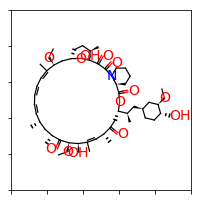

In [37]:
mol0 = Chem.rdmolfiles.MolFromSmiles(rapamycin_SMILES_isomeric)
fig = Draw.MolToMPL(mol0, size=(100, 100), wedgeBonds=True)

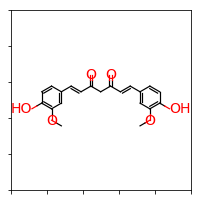

In [38]:
mol1 = Chem.rdmolfiles.MolFromSmiles(circumin_SMILES_isomeric)
fig = Draw.MolToMPL(mol1, size=(100, 100), wedgeBonds=True)

In [40]:
foo0 = FingerprintMols.FingerprintMol(mol0)
foo1 = FingerprintMols.FingerprintMol(mol1)

In [28]:
def cast_as_array(bitvector):
    bitstring = bitvector.ToBitString() #makes string of bits
    map_ints = map(int, bitstring) #maps ints to string
    return np.array(list(map_ints)) #lists string of ints

In [41]:
arr0 = cast_as_array(foo0)
len(arr0)

2048

In [43]:
arr1 = cast_as_array(foo1)
len(arr1)

1024

In [47]:
DataStructs.FingerprintSimilarity(foo0, foo1, metric=DataStructs.TanimotoSimilarity)

0.29751131221719457